# Poshmark
is a leading social marketplace for new and secondhand style for women, men, kids, pets, home, and more. By combining the human connection of physical shopping with the scale, ease, and selection benefits of e-commerce, Poshmark makes buying and selling simple, social, and sustainable. Its community of more than 80 million registered users across the U.S., Canada, Australia, and India, is driving the future of commerce while promoting more sustainable consumption. For more information, please visit www.poshmark.com, and for company news and announcements, please visit investors.poshmark.com. You can also find Poshmark on Instagram, Facebook, Twitter, Pinterest, and YouTube.


Here I am going to analysis the men's section from the poshmark website. First I scraped the data like title, category, sale_price , normal_price, seller's name, and product size. Then created an data frame out of raw data for further data analysis then done some data cleaning like changing column name, removing characters, handling duplicates, changing data types and then used some visulization for finding relationship between various features.  

Second thing I have done a rough Statistical Analysis and build an rough regression model for predicting sale_price value based on regular_price.

At last I exported the data in csv for using in creating an PowerBI dashboard.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Scraping data from the site
import requests
from bs4 import BeautifulSoup

# Initialize the page number and empty list for storing data
page_num = 1
data = []

while True:
    # Construct the URL for the current page
    URL = f"https://poshmark.com/category/Men?max_id={page_num}"
    page = requests.get(URL)

    # Parse the HTML of the page
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find all items on the page
    items = soup.find_all('div', class_='item__details')

    # If there are no items on the page, we have reached the last page
    if not items:
        break

    # Iterate over each item and extract the relevant data
    for item in items:
        # Find the title element
        product_name = soup.find('a', class_='tile__title')
        # Extract the title text
        product_name = product_name.text
        
        # Find the price elements
        price_elements = soup.find_all('span', class_='fw--bold')
        # Extract the price text
        regular_price = price_elements[0].text
        sale_price = price_elements[1].text

        # Find the seller element
        seller_element = soup.find('a', class_='tile__creator')
        # Extract the seller name
        seller = seller_element.text

        # Find the size element
        size_element = soup.find('a', class_='tile__details__pipe__size')
        # Extract the size text
        size = size_element.text.strip()[6:]

        # Find the category element
        brand = soup.find('a', class_='tile__details__pipe__brand')
        # Extract the category text
        brand = brand.text

       

        # Store the data in a dictionary
        item_data = {
            'product_name': product_name,
            'regular_price': regular_price,
            'sale_price': sale_price,
            'seller': seller,
            'size': size,
            'brand': brand
                    }
        # Append the dictionary to the list
        data.append(item_data)

    # Increment the page number
    page_num += 1



# Exploratory Data Analysis

In [3]:
#creating dataframe from the scrapped data
df=pd.DataFrame(data)

In [4]:
df.head()

,product_name,regular_price,sale_price,seller,size,brand
0,\n MICHAEL KORS SWEATER NWT\n ...,\n $85\n,\n $18\n,chelstreasures,XL,\n Michael Kors\n
1,\n MICHAEL KORS SWEATER NWT\n ...,\n $85\n,\n $18\n,chelstreasures,XL,\n Michael Kors\n
2,\n MICHAEL KORS SWEATER NWT\n ...,\n $85\n,\n $18\n,chelstreasures,XL,\n Michael Kors\n
3,\n MICHAEL KORS SWEATER NWT\n ...,\n $85\n,\n $18\n,chelstreasures,XL,\n Michael Kors\n
4,\n MICHAEL KORS SWEATER NWT\n ...,\n $85\n,\n $18\n,chelstreasures,XL,\n Michael Kors\n


In [5]:
#cleaning the data and replacing undwanted characters.
df['product_name'] = df['product_name'].str.replace('\n', '')
df['regular_price']=df['regular_price'].str.replace('\n', '')
df['sale_price']=df['sale_price'].str.replace('\n', '')
df['brand']=df['brand'].str.replace('\n', '')
df['regular_price']=df['regular_price'].str.replace('$', '')
df['sale_price']=df['sale_price'].str.replace('$', '')
df['regular_price']=df['regular_price'].str.replace(' ', '')
df['sale_price']=df['sale_price'].str.replace(' ', '')
df['regular_price']=df['regular_price'].str.replace(',', '')
df['sale_price']=df['sale_price'].str.replace(',', '')

C:\Users\sagar\AppData\Local\Temp\ipykernel_21740\1894172858.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['regular_price']=df['regular_price'].str.replace('$', '')
C:\Users\sagar\AppData\Local\Temp\ipykernel_21740\1894172858.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sale_price']=df['sale_price'].str.replace('$', '')


In [6]:
df.head()

,product_name,regular_price,sale_price,seller,size,brand
0,MICHAEL KORS SWEATER NWT ...,85,18,chelstreasures,XL,Michael Kors
1,MICHAEL KORS SWEATER NWT ...,85,18,chelstreasures,XL,Michael Kors
2,MICHAEL KORS SWEATER NWT ...,85,18,chelstreasures,XL,Michael Kors
3,MICHAEL KORS SWEATER NWT ...,85,18,chelstreasures,XL,Michael Kors
4,MICHAEL KORS SWEATER NWT ...,85,18,chelstreasures,XL,Michael Kors


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   5040 non-null   object
 1   regular_price  5040 non-null   object
 2   sale_price     5040 non-null   object
 3   seller         5040 non-null   object
 4   size           5040 non-null   object
 5   brand          5040 non-null   object
dtypes: object(6)
memory usage: 236.4+ KB


In [8]:
#datatype conversion for further analysis 
df['regular_price'] = df['regular_price'].astype(int)
df['sale_price']=df['sale_price'].astype(int)

In [9]:
#dropping duplicates 
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 4992
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   105 non-null    object
 1   regular_price  105 non-null    int32 
 2   sale_price     105 non-null    int32 
 3   seller         105 non-null    object
 4   size           105 non-null    object
 5   brand          105 non-null    object
dtypes: int32(2), object(4)
memory usage: 4.9+ KB


In [11]:
#Check for missing values:
df.isnull().sum()

product_name     0
regular_price    0
sale_price       0
seller           0
size             0
brand            0
dtype: int64

In [12]:
#Look at some summary statistics of the numerical columns:
df.describe()


,regular_price,sale_price
count,105.000000,105.000000
mean,47.428571,56.990476
std,82.066912,176.401721
min,5.000000,5.000000
25%,20.000000,18.000000
50%,29.000000,25.000000
75%,49.000000,40.000000
max,775.000000,1800.000000


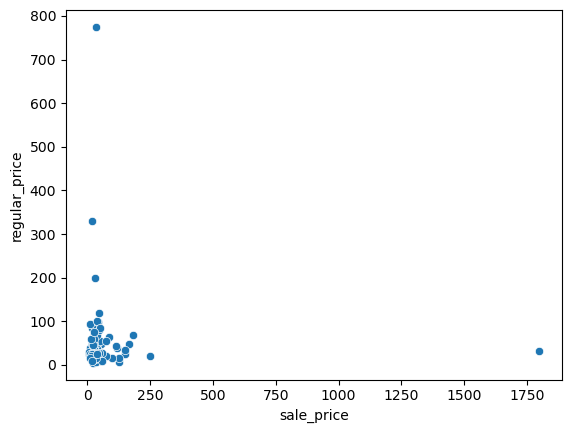

In [14]:
#Create some visualizations to get a better understanding of the data:

sns.scatterplot(y='regular_price', x='sale_price', data=df)
plt.show()


A scatterplot is a type of data display that shows the relationship between two numerical variables.When the y variable tends to increase as the x variable increases, we say there is a positive correlation between the variables.
When the y variable tends to decrease as the x variable increases, we say there is a negative correlation between the variables.When there is no clear relationship between the two variables, we say there is no correlation between the two variables.
More or less we can say there is neagtive correlation(approx) between the variables.

Here we can observe 2-3 outliers in both the variables.


In [17]:
from scipy import stats

In [18]:
# Calculate the Z-scores of the regular_price column
z_scores = stats.zscore(df['regular_price'])

# Find the index of the rows with Z-scores greater than 3
outliers = np.where(z_scores > 3)
# Drop the rows with outliers
df = df.drop(df.index[outliers])

Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

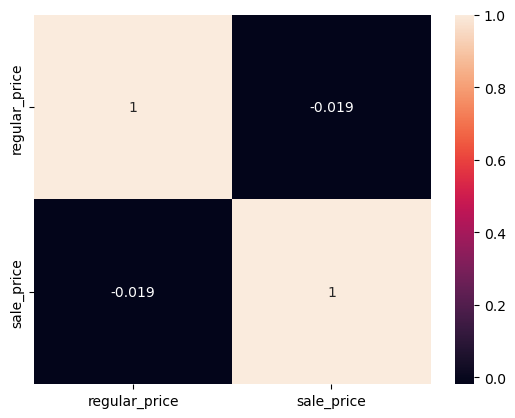

In [22]:
#Heatmaps to see the correlation between numerical columns:

sns.heatmap(df[['regular_price', 'sale_price']].corr(), annot=True)
plt.show()

As we can conclude that the correlation between sale_price and regular_price is -0.0026 which is approximately negative.
Negative or inverse correlation describes when two variables tend to move in opposite sizes and directions from one another, such that when one increases the other variable decreases, and vice-versa.

# STATISTICAL DATA ANALYSIS

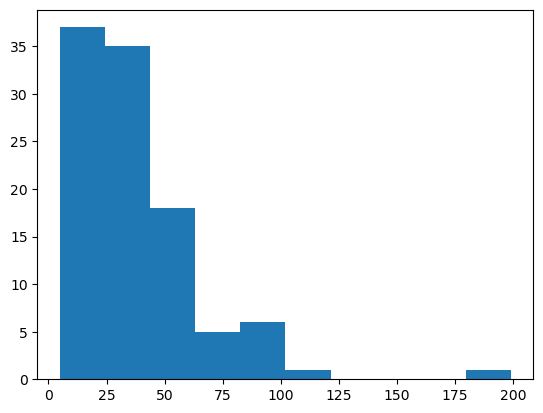

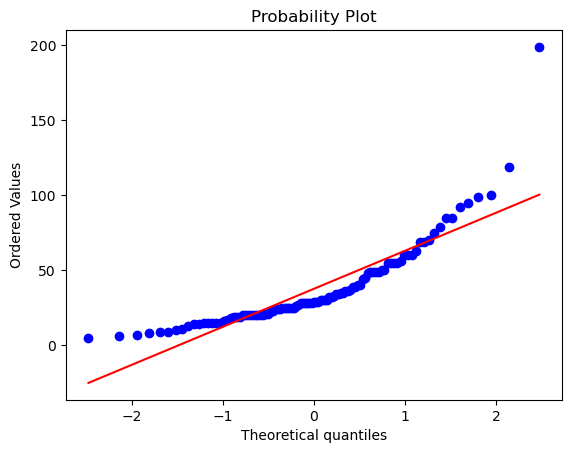

In [23]:
#Check for normality of the data by creating a histogram and/or Q-Q plot:

# Histogram
plt.hist(df['regular_price'])
plt.show()

# Q-Q plot
import scipy.stats as stats

stats.probplot(df['regular_price'], plot=plt)
plt.show()

We can conclude that it is an right skewed histogram.The relation between right skewed histogram mean, median, and mode is Mean > Median > Mode.

In [24]:
#Calculate some summary statistics:


# Mean
print(df['regular_price'].mean())

# Median
print(df['regular_price'].median())

# Standard deviation
print(df['regular_price'].std())

# Skewness
print(df['regular_price'].skew())

# Kurtosis
print(df['regular_price'].kurt())

37.63106796116505
29.0
28.337597242457388
2.477325962822863
9.832000149679198


Here we see the values for mean median and mode and can check skewness and kurtosis.A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.Kurtosis describes the "fatness" of the tails found in probability distributions.

In [25]:
#Test for statistical significance between two groups:

# For example, to test for a difference in regular_price between products sold by seller A and seller B:
from scipy.stats import ttest_ind

seller_a = df[df['seller'] == 'A']['regular_price']
seller_b = df[df['seller'] == 'B']['regular_price']

ttest_ind(seller_a, seller_b)

Ttest_indResult(statistic=nan, pvalue=nan)

In [26]:
#Use regression to predict a numerical value:

from sklearn.linear_model import LinearRegression

# Split the data into predictor (X) and target (y) variables
X = df[['regular_price']]
y = df['sale_price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

To check the accuracy of your prediction model, you can compare the predicted values to the actual values and calculate the error. One common metric for evaluating regression models is the mean squared error (MSE), which is calculated as the average of the squared differences between the predicted and actual values.

Here's how you can calculate the MSE for your model:


In [27]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y, predictions)
print(mse)

31388.409278247807


In [28]:
#we can also calculate the root mean squared error (RMSE) by taking the square root of the MSE:
from math import sqrt

# Calculate the root mean squared error
rmse = sqrt(mse)
print(rmse)

177.1677433345241


Another common metric for evaluating regression models is the coefficient of determination, or R-squared. This metric measures the proportion of the variance in the target variable that is explained by the predictor variables. An R-squared value of 1 indicates a perfect prediction, and a value of 0 means the model is no better than guessing the mean of the target variable.

You can calculate the R-squared value for your model like this:


In [29]:
# Calculate the R-squared value
r2 = model.score(X, y)
print(r2)

0.00036512819649581196


In [30]:
df.to_csv('poshmark_df.csv', index=False)
